### Agentic RAG

In [ ]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")


In [2]:
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import FAISS
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import RecursiveCharacterTextSplitter
from langchain_huggingface import HuggingFaceEmbeddings

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [3]:
urls=[
    "https://langchain-ai.github.io/langgraph/tutorials/introduction/",
    "https://langchain-ai.github.io/langgraph/tutorials/workflows/",
    "https://langchain-ai.github.io/langgraph/how-tos/map-reduce/"
]

docs=[WebBaseLoader(url).load() for url in urls]
docs


[[Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/introduction/', 'title': 'Redirecting...', 'language': 'en'}, page_content='\n\n\n\n\nRedirecting...\n\n\n\n\n\n\nRedirecting...\n\n\n')],
 [Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Redirecting...', 'language': 'en'}, page_content='\n\n\n\n\nRedirecting...\n\n\n\n\n\n\nRedirecting...\n\n\n')],
 [Document(metadata={'source': 'https://langchain-ai.github.io/langgraph/how-tos/map-reduce/', 'title': 'Redirecting...', 'language': 'en'}, page_content='\n\n\n\n\nRedirecting...\n\n\n\n\n\n\nRedirecting...\n\n\n')]]

In [4]:
docs_list = [item for sublist in docs for item in sublist]

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000, chunk_overlap=100
)

doc_splits = text_splitter.split_documents(docs_list)

## Add alll these text to vectordb

vectorstore=FAISS.from_documents(
    documents=doc_splits,
    embedding=HuggingFaceEmbeddings()
)


retriever=vectorstore.as_retriever()

In [5]:
retriever.invoke("what is langgraph")

[Document(id='99ad579c-5846-4ef9-9672-291a55d611f8', metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/introduction/', 'title': 'Redirecting...', 'language': 'en'}, page_content='Redirecting...\n\n\n\n\n\n\nRedirecting...'),
 Document(id='8caf839b-da4f-432a-9696-6bd1fae4f21d', metadata={'source': 'https://langchain-ai.github.io/langgraph/tutorials/workflows/', 'title': 'Redirecting...', 'language': 'en'}, page_content='Redirecting...\n\n\n\n\n\n\nRedirecting...'),
 Document(id='d0c5ad4a-a27e-4db9-bb1b-b954f07f7b9c', metadata={'source': 'https://langchain-ai.github.io/langgraph/how-tos/map-reduce/', 'title': 'Redirecting...', 'language': 'en'}, page_content='Redirecting...\n\n\n\n\n\n\nRedirecting...')]

In [6]:
### Retriever To Retriever Tools
from langchain_core.tools import create_retriever_tool



retriever_tool=create_retriever_tool(
    retriever,
    "retriever_vector_db_blog",
    "Search and run information about Langgraph"
)

In [7]:
retriever_tool

StructuredTool(name='retriever_vector_db_blog', description='Search and run information about Langgraph', args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=<function create_retriever_tool.<locals>.func at 0x000002864C3D3CE0>, coroutine=<function create_retriever_tool.<locals>.afunc at 0x000002864C3D3A60>)

### Langchain Blogs- Seperate Vector Store


In [8]:
langchain_urls=[
    "https://python.langchain.com/docs/tutorials/",
    "https://python.langchain.com/docs/tutorials/chatbot/",
    "https://python.langchain.com/docs/tutorials/qa_chat_history/"
]

docs=[WebBaseLoader(url).load() for url in langchain_urls]
docs

[[Document(metadata={'source': 'https://python.langchain.com/docs/tutorials/', 'title': 'LangChain overview - Docs by LangChain', 'description': 'LangChain is an open source framework with a pre-built agent architecture and integrations for any model or tool — so you can build agents that adapt as fast as the ecosystem evolves', 'language': 'en'}, page_content='LangChain overview - Docs by LangChainSkip to main contentDocs by LangChain home pageOpen sourceSearch...⌘KAsk AIGitHubTry LangSmithTry LangSmithSearch...NavigationLangChain overviewDeep AgentsLangChainLangGraphIntegrationsLearnReferenceContributePythonOverviewGet startedInstallQuickstartChangelogPhilosophyCore componentsAgentsModelsMessagesToolsShort-term memoryStreamingStructured outputMiddlewareOverviewPrebuilt middlewareCustom middlewareAdvanced usageGuardrailsRuntimeContext engineeringModel Context Protocol (MCP)Human-in-the-loopMulti-agentRetrievalLong-term memoryAgent developmentLangSmith StudioTestAgent Chat UIDeploy wit

In [9]:
docs_list = [item for sublist in docs for item in sublist]

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000, chunk_overlap=100
)

doc_splits = text_splitter.split_documents(docs_list)

## Add alll these text to vectordb

vectorstorelangchain=FAISS.from_documents(
    documents=doc_splits,
    embedding=HuggingFaceEmbeddings()
)


retrieverlangchain=vectorstorelangchain.as_retriever()

In [10]:
from langchain_core.tools import create_retriever_tool

retriever_tool_langchain=create_retriever_tool(
    retrieverlangchain,
    "retriever_vector_langchain_blog",
    "Search and run information about Langchain"
)

In [11]:
import os
import requests
from langchain.tools import tool

@tool
def get_weather(city: str) -> str:
    """Get current weather for a given city."""
    
    api_key = os.getenv("WEATHER_API_KEY")
    if not api_key:
        return "Weather API key not set"

    url = f"https://api.weatherapi.com/v1/current.json?key={api_key}&q={city}"
    resp = requests.get(url)
    data = resp.json()

    if "error" in data:
        return f"Weather API error: {data['error']['message']}"

    return f"{data['location']['name']} is {data['current']['temp_c']}°C"

get_weather.invoke({"city": "bengaluru"})


'Bengaluru is 19.3°C'

In [12]:
tools=[retriever_tool,retriever_tool_langchain,get_weather]

In [13]:
tools

[StructuredTool(name='retriever_vector_db_blog', description='Search and run information about Langgraph', args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=<function create_retriever_tool.<locals>.func at 0x000002864C3D3CE0>, coroutine=<function create_retriever_tool.<locals>.afunc at 0x000002864C3D3A60>),
 StructuredTool(name='retriever_vector_langchain_blog', description='Search and run information about Langchain', args_schema=<class 'langchain_core.tools.retriever.RetrieverInput'>, func=<function create_retriever_tool.<locals>.func at 0x00000286329C6A20>, coroutine=<function create_retriever_tool.<locals>.afunc at 0x00000286329C6DE0>),
 StructuredTool(name='get_weather', description='Get current weather for a given city.', args_schema=<class 'langchain_core.utils.pydantic.get_weather'>, func=<function get_weather at 0x000002864C43BE20>)]

### LangGraph Workflow

In [14]:
from typing import Annotated, Sequence
from typing_extensions import TypedDict

from langchain_core.messages import BaseMessage
from langgraph.graph.message import add_messages

class AgentState(TypedDict):
    messages: Annotated[Sequence[BaseMessage],add_messages]

In [15]:
from langchain_groq import ChatGroq

llm = ChatGroq(model="openai/gpt-oss-120b")
llm.invoke("hi")

AIMessage(content='Hello! How can I help you today?', additional_kwargs={'reasoning_content': 'The user says "hi". We need to respond politely. No special instructions. Just greet back.'}, response_metadata={'token_usage': {'completion_tokens': 39, 'prompt_tokens': 72, 'total_tokens': 111, 'completion_time': 0.082169569, 'completion_tokens_details': {'reasoning_tokens': 21}, 'prompt_time': 0.002877434, 'prompt_tokens_details': None, 'queue_time': 0.045750216, 'total_time': 0.085047003}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_626f3fc5e0', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c6828-fab1-78c2-9f8d-e9e18cca4e1c-0', tool_calls=[], invalid_tool_calls=[], usage_metadata={'input_tokens': 72, 'output_tokens': 39, 'total_tokens': 111, 'output_token_details': {'reasoning': 21}})

In [16]:
def agent(state):
    """
    Invokes the agent model to generate a response based on current state. Given the question, it will decide to retrieve using 
    the retriever tools, for weather related questions use get_weather tool.
    
    Args:
        state (messages): The current state

    Returns:
        dict: The updated state with the response added to the messages
    
    
    """
    
    print("---CALL AGENT---")
    messages = state["messages"]
    model = ChatGroq(model="openai/gpt-oss-120b")
    model = model.bind_tools(tools)
    response = model.invoke(messages)
    return {
        "messages": messages + [response]
        }


In [17]:
from typing import Annotated, Literal, Sequence
from typing_extensions import TypedDict

from langchain_classic import hub
from langchain_core.messages import BaseMessage, HumanMessage
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate

from pydantic import BaseModel, Field

In [18]:
### Edges
def grade_documents(state) -> Literal["generate", "rewrite"]:
    """
    Determines whether the retrieved documents are relevant to the question.

    Args:
        state (messages): The current state

    Returns:
        str: A decision for whether the documents are relevant or not
    """

    print("---CHECK RELEVANCE---")

    # Data model
    class grade(BaseModel):
        """Binary score for relevance check."""

        binary_score: str = Field(description="Relevance score 'yes' or 'no'")

    # LLM
    model = ChatGroq(model="openai/gpt-oss-120b")

    # LLM with tool and validation
    llm_with_tool = model.with_structured_output(grade)

    # Prompt
    prompt = PromptTemplate(
        template="""You are a grader assessing relevance of a retrieved document to a user question. \n 
        Here is the retrieved document: \n\n {context} \n\n
        Here is the user question: {question} \n
        If the document contains keyword(s) or semantic meaning related to the user question, grade it as relevant. \n
        Give a binary score 'yes' or 'no' score to indicate whether the document is relevant to the question.""",
        input_variables=["context", "question"],
    )

    # Chain
    chain = prompt | llm_with_tool

    messages = state["messages"]
    last_message = messages[-1]

    question = messages[0].content
    docs = last_message.content

    scored_result = chain.invoke({"question": question, "context": docs})

    score = scored_result.binary_score

    if score == "yes":
        print("---DECISION: DOCS RELEVANT---")
        return "generate"

    else:
        print("---DECISION: DOCS NOT RELEVANT---")
        print(score)
        return "rewrite"

In [19]:
def generate(state):
    """
    Generate answer

    Args:
        state (messages): The current state

    Returns:
         dict: The updated message
    """
    print("---GENERATE---")
    messages = state["messages"]
    question = messages[0].content
    last_message = messages[-1]

    docs = last_message.content

    # Prompt
    prompt = hub.pull("rlm/rag-prompt")

    # LLM
    llm = ChatGroq(model="openai/gpt-oss-120b")

    # Post-processing
    def format_docs(docs):
        return "\n\n".join(doc.page_content for doc in docs)

    # Chain
    rag_chain = prompt | llm | StrOutputParser()

    # Run
    response = rag_chain.invoke({"context": docs, "question": question})
    return {"messages": [response]}

In [20]:
def rewrite(state):
    """
    Transform the query to produce a better question.

    Args:
        state (messages): The current state

    Returns:
        dict: The updated state with re-phrased question
    """

    print("---TRANSFORM QUERY---")
    messages = state["messages"]
    question = messages[0].content

    msg = [
        HumanMessage(
            content=f""" \n 
    Look at the input and try to reason about the underlying semantic intent / meaning. \n 
    Here is the initial question:
    \n ------- \n
    {question} 
    \n ------- \n
    Formulate an improved question: """,
        )
    ]

    # Grader
    model = ChatGroq(model="openai/gpt-oss-120b")
    response = model.invoke(msg)
    return {"messages": [response]}

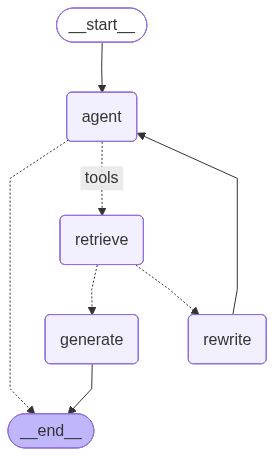

In [21]:
from langgraph.graph import END, StateGraph, START
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

# Define a new graph
workflow = StateGraph(AgentState)

# Define the nodes we will cycle between
workflow.add_node("agent", agent)  # agent
retrieve = ToolNode([retriever_tool,retriever_tool_langchain,get_weather])
workflow.add_node("retrieve", retrieve)  # retrieval
workflow.add_node("rewrite", rewrite)  # Re-writing the question
workflow.add_node(
    "generate", generate
)  # Generating a response after we know the documents are relevant
# Call agent node to decide to retrieve or not
workflow.add_edge(START, "agent")

# Decide whether to retrieve
workflow.add_conditional_edges(
    "agent",
    # Assess agent decision
    tools_condition,
    {
        # Translate the condition outputs to nodes in our graph
        "tools": "retrieve",
        END: END,
    },
)

# Edges taken after the `action` node is called.
workflow.add_conditional_edges(
    "retrieve",
    # Assess agent decision
    grade_documents,
)
workflow.add_edge("generate", END)
workflow.add_edge("rewrite", "agent")

# Compile
graph = workflow.compile()
from IPython.display import Image, display
display(Image(graph.get_graph(xray=True).draw_mermaid_png()))


In [22]:
graph.invoke({"messages": [HumanMessage(content="What is LangGraph?")]})

---CALL AGENT---


---CHECK RELEVANCE---


---DECISION: DOCS NOT RELEVANT---
no
---TRANSFORM QUERY---


---CALL AGENT---


{'messages': [HumanMessage(content='What is LangGraph?', additional_kwargs={}, response_metadata={}, id='b5fe4c91-9ab7-49a1-ba22-bef27d9f4197'),
  AIMessage(content='', additional_kwargs={'reasoning_content': 'We need to answer: "What is LangGraph?" Probably a brief explanation. Use knowledge. Could also fetch from web using function. Let\'s search.', 'tool_calls': [{'id': 'fc_73ca3f9a-31d5-4b0e-b6a7-0b496377cba1', 'function': {'arguments': '{"query":"LangGraph"}', 'name': 'retriever_vector_db_blog'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 63, 'prompt_tokens': 195, 'total_tokens': 258, 'completion_time': 0.137176729, 'completion_tokens_details': {'reasoning_tokens': 31}, 'prompt_time': 0.007765875, 'prompt_tokens_details': None, 'queue_time': 0.044677705, 'total_time': 0.144942604}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_a09bde29de', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provi

In [23]:
graph.invoke({"messages": "what is machine learning"})

---CALL AGENT---


{'messages': [HumanMessage(content='what is machine learning', additional_kwargs={}, response_metadata={}, id='c68382bd-ee50-4b72-9a6a-99c2c1e1b3f0'),
  AIMessage(content='**Machine learning (ML)** is a branch of artificial intelligence that focuses on building systems that can learn from data rather than being explicitly programmed for every task. \n\n### Core Idea\n- **Data\u202f→\u202fPattern\u202f→\u202fPrediction/Decision**  \n  An ML model ingests examples (training data), discovers patterns or relationships within that data, and then uses those learned patterns to make predictions, classifications, or decisions on new, unseen inputs.\n\n### How It Works\n1. **Collect Data** – Gather labeled (or unlabeled) examples relevant to the problem.\n2. **Choose a Model** – Select an algorithm (e.g., linear regression, decision tree, neural network) that can represent the relationship you want to learn.\n3. **Training** – Adjust the model’s internal parameters (weights, thresholds, etc.) t

In [24]:
graph.invoke({"messages": "weather in bengaluru"})

---CALL AGENT---


---CHECK RELEVANCE---


---DECISION: DOCS RELEVANT---
---GENERATE---


{'messages': [HumanMessage(content='weather in bengaluru', additional_kwargs={}, response_metadata={}, id='0e408caa-b291-41d5-bbf0-1414ab7bab84'),
  AIMessage(content='', additional_kwargs={'reasoning_content': 'User asks "weather in bengaluru". We need to get current weather using get_weather tool.', 'tool_calls': [{'id': 'fc_16512029-5893-4e16-8349-f25a72434b22', 'function': {'arguments': '{"city":"Bengaluru"}', 'name': 'get_weather'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 51, 'prompt_tokens': 195, 'total_tokens': 246, 'completion_time': 0.113948723, 'completion_tokens_details': {'reasoning_tokens': 21}, 'prompt_time': 0.008754897, 'prompt_tokens_details': None, 'queue_time': 0.045619051, 'total_time': 0.12270362}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_a09bde29de', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'}, id='lc_run--019c6829-2950-7af1-9b17-c97aedfb7e3b-0'

In [25]:
#EVAL

EVAL_SET = [
    {
        "question": "what is langchain?",
        "expected_keywords": ["langchain"]
    },
    {
        "question": "what is langgraph?",
        "expected_keywords": ["langgraph"]
    },
    {
        "question": "What is the weather in Delhi?",
        "expected_keywords": ["Delhi", "°C"]
    }
]


In [26]:
from langchain_core.messages import HumanMessage

def call_agent(question: str):
    # initial state for your agent
    state = {
        "messages": [HumanMessage(content=question)]
    }

    final_state = graph.invoke(state)

    # last message is model output
    last_message = final_state["messages"][-1]

    return last_message.content

In [27]:
def run_eval(eval_set):
    passed = 0
    results = []

    for item in eval_set:
        q = item["question"]
        expected = item["expected_keywords"]

        print(f"\nQ: {q}")
        answer = call_agent(q)
        print(f"A: {answer}")

        score = all(word.lower() in answer.lower() for word in expected)

        if score:
            print("✅ PASS")
            passed += 1
        else:
            print("❌ FAIL")

        results.append({
            "question": q,
            "answer": answer,
            "passed": score
        })

    accuracy = passed / len(eval_set)
    print(f"\nFinal accuracy: {accuracy * 100:.2f}%")

    return results, accuracy

results, accuracy = run_eval(EVAL_SET)



Q: what is langchain?
---CALL AGENT---


A: **LangChain** is an open‑source framework that makes it easy to build applications powered by large language models (LLMs). It provides the building blocks, abstractions, and utilities you need to connect LLMs with external data sources, APIs, and user interfaces, enabling you to create sophisticated “LLM‑first” products such as chatbots, agents, data‑augmented generators, and more.

---

## Core Concepts

| Concept | What It Is | Why It Matters |
|---------|------------|----------------|
| **LLM Wrapper** | A thin abstraction around any LLM (OpenAI, Anthropic, Cohere, Hugging Face, etc.) that standardizes calls, streaming, token‑counting, and error handling. | Lets you swap models or providers without rewriting code. |
| **Prompt Templates** | Structured ways to create prompts (simple strings, few‑shot examples, chat‑style messages) with variable interpolation. | Guarantees consistent, reusable prompting and reduces prompt‑brittleness. |
| **Chains** | Sequential pipelines that pas

A: **LangGraph** is an open‑source Python library (maintained by the LangChain team) that makes it easy to build **state‑driven, multi‑step LLM applications** as **directed graphs** of “nodes” (functions, prompts, tools, or other agents).  

---

## Why it exists

Large language models are great at single‑turn inference, but many real‑world tasks require:

| Requirement | Traditional LLM approach | LangGraph solution |
|-------------|--------------------------|--------------------|
| **Multi‑step reasoning** (e.g., “search → summarize → decide”) | You have to write ad‑hoc loops or chain together many LangChain components manually. | Define each step as a node and let the graph orchestrate the flow. |
| **Conditional branching** (e.g., “if the answer is ambiguous, ask the user”) | Hard‑coded if‑else logic scattered across code. | Graph edges can be conditional, based on the **state** that all nodes read/write. |
| **Loops / retries** (e.g., “re‑ask until confidence > 0.9”) | You need cu

---CHECK RELEVANCE---


---DECISION: DOCS RELEVANT---
---GENERATE---


A: The temperature in Delhi is 2.4 °C.
✅ PASS

Final accuracy: 100.00%


In [28]:
results, accuracy = run_eval(EVAL_SET)



Q: what is langchain?
---CALL AGENT---


A: **LangChain** is an open‑source framework that makes it easier to build applications powered by large language models (LLMs). It provides a set of modular components and abstractions that let developers:

| Area | What LangChain Provides |
|------|--------------------------|
| **LLM Integration** | Simple wrappers for many LLM providers (OpenAI, Anthropic, Cohere, Hugging Face, Azure, etc.) so you can call a model with a single line of code. |
| **Prompt Management** | Prompt templates, chaining, and dynamic prompt generation (e.g., few‑shot, few‑shot‑with‑examples, chat history). |
| **Memory** | Built‑in “memory” objects that let a chain remember past interactions, enabling conversational agents that keep context across turns. |
| **Chains** | A **Chain** is a sequence of calls (LLM → prompt → post‑processing) that can be composed, nested, or conditionally executed. |
| **Agents** | Agents combine an LLM with a **tool‑use** loop: the model decides which tool (e.g., search, calcula

---CHECK RELEVANCE---


---DECISION: DOCS NOT RELEVANT---
no
---TRANSFORM QUERY---


---CALL AGENT---


---CHECK RELEVANCE---


---DECISION: DOCS NOT RELEVANT---
no
---TRANSFORM QUERY---


---CALL AGENT---


A: ## LangGraph – at a glance  

| Aspect | What it is | Why it matters |
|--------|------------|----------------|
| **Definition** | An open‑source Python library (maintained by the LangChain team) for **building, visualising, and executing graph‑structured workflows** that orchestrate Large Language Models (LLMs), tools, and other services. | It turns the often‑linear “prompt‑‑>completion” pattern into a **state‑machine / directed‑graph** where each node can be a prompt, a tool call, a conditional branch, a loop, or any custom Python function. |
| **Core goal** | Make **complex, multi‑turn, stateful LLM applications** (chat assistants, agents, data pipelines, decision‑making bots, etc.) **easy to design, test, debug, and maintain**. | As LLM‑driven products get richer (retrieval‑augmented generation, tool‑use, self‑reflection, multi‑agent coordination), a graph abstraction gives you a clear mental model and reusable components. |
| **Relationship to LangChain** | LangGraph is built o

---CHECK RELEVANCE---


---DECISION: DOCS RELEVANT---
---GENERATE---


A: The temperature in Delhi is 2.4 °C.
✅ PASS

Final accuracy: 100.00%


In [29]:
# ===== CI ENTRYPOINT =====

results, accuracy = run_eval(EVAL_SET)

# Fail CI if accuracy is too low
if accuracy < 0.7:
    raise Exception("Evaluation accuracy below threshold")



Q: what is langchain?
---CALL AGENT---


A: **LangChain** is an open‑source framework that makes it easier to build **applications powered by large language models (LLMs)**—especially those that need to go beyond a single prompt‑completion cycle.  

### Core ideas

| Concept | What it means |
|---------|---------------|
| **Chains** | A *chain* is a sequence (or graph) of operations that combine LLM calls, prompts, data look‑ups, and other logic. You can think of it as a “pipeline” that takes an input, runs one or more steps, and returns a result. |
| **Agents** | An *agent* is a more autonomous component that decides **what** actions to take next (e.g., “search the web”, “call a calculator”, “write a summary”) based on the LLM’s reasoning. Agents use tools and can loop until a goal is reached. |
| **Memory** | For multi‑turn conversations, *memory* stores past interactions (or extracted facts) so the LLM can refer back to them. LangChain provides simple in‑memory buffers, vector‑store‑backed memory, and custom implementation

---CHECK RELEVANCE---


---DECISION: DOCS NOT RELEVANT---
no
---TRANSFORM QUERY---


---CALL AGENT---


A: ## LangGraph – a quick‑look

**LangGraph** is an open‑source Python library (maintained by the LangChain team) that lets you **compose, run, and debug complex LLM‑driven workflows as directed graphs**.  
Think of it as the “state‑machine / workflow engine” that sits on top of LangChain’s building blocks (LLMs, prompts, tools, memory, etc.) and gives you a clean way to describe multi‑step, branching, looping, and reusable logic.

| Aspect | What it means |
|--------|----------------|
| **Core idea** | Model an LLM application as a **graph** where each node is a piece of logic (LLM call, tool, custom Python function, memory update, etc.) and edges define the next step based on the node’s output. |
| **Primary goal** | Make *complex* LLM agents **deterministic, testable, debuggable, and reusable** without scattering control flow across ad‑hoc `if/else` blocks. |
| **Relation to LangChain** | LangChain provides the *components* (LLM wrappers, prompts, tools, memory). LangGraph provides 

---CHECK RELEVANCE---


---DECISION: DOCS RELEVANT---
---GENERATE---


A: The temperature in Delhi is 2.4 °C.
✅ PASS

Final accuracy: 100.00%
